#  Basic Code Implementation for Graph Laplacian

In [129]:
import numpy as np
import pandas as pd
from numpy import linalg
import matplotlib.pyplot as plt
import networkx as nx 

## Creating the Adjacency and Laplacian matrices:

In [130]:
# Function that creates the Adjacency matrix
def Adjacency(A):
    n=np.amax(A)+1
    X=np.zeros((n,n))
    for c in A:
        c=c.T
        X[c[0]][c[1]]=1
        X[c[1]][c[0]]=1 
    return X

In [131]:
def generate_graph_laplacian(df):
    W=Adjacency(A)
    # Degree of a node = Sum of corresponding row in Adjacency matrix
    D=np.diag(W.sum(axis = 1))
    # Laplacian = Degree - Adjacency
    L=D-W
    return L

## Computing the eigenvalues & eigenvectors: 

In [132]:
def compute_spectrum_graph_laplacian(graph_laplacian):
    eigenvals, eigenvcts = linalg.eig(graph_laplacian)
    # Taking the real part of the eigen values and eigen vectors
    eigenvals = np.real(eigenvals)
    eigenvcts = np.real(eigenvcts)
    return eigenvals, eigenvcts

## Finding the 2nd smallest eigenvalue & corresponding eigenvector:

In [133]:
def project_and_transpose(eigenvals, eigenvcts):
    eigenvals_sorted_indices = np.argsort(eigenvals) #Returns the indices that would sort an array
    c = 0 #Variable which counts the number of eigenvalues that are almost 0
    for i in eigenvals:
        # Setting tolerance for eigenvalue 
        if i<1e-4: #If value < tol --> taking eigenvalue = 0
            c += 1
    # Finding indices of 2nd smallest eigenvalue
    indices = eigenvals_sorted_indices[:c+1]
    # Taking the corresponding eigenvector
    proj_df = pd.DataFrame(eigenvcts[:, indices.squeeze()])
    soln = proj_df[len(proj_df.T)-1]
    return soln

## Partitioning:

In [134]:
def lap_graph_partitioning(A):
    x,y = compute_spectrum_graph_laplacian(generate_graph_laplacian(A))
    pro = project_and_transpose(x,y)
    d={} #Empty dictionary to store the indices and corresponding partition
    c=0
    for i in pro:
        if i<0:  #If entry is negative --> node corresponds to partition A
            d[c]='A'
            c=c+1
        else:   #If entry is positive --> node corresponds to partition B
            d[c]='B' 
            c=c+1
    return d

In [135]:
A = np.array(pd.read_excel('inp_lap.xlsx'))
d = lap_graph_partitioning(A)
print("Nodes with their corresponding partition:\n", d)

Nodes with their corresponding partition:
 {0: 'A', 1: 'A', 2: 'A', 3: 'A', 4: 'A', 5: 'B', 6: 'B', 7: 'B'}


## Visualing the output:

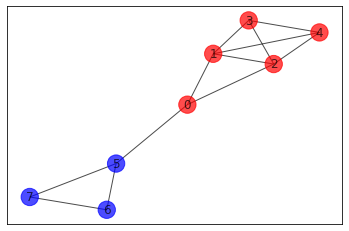

In [136]:
G = nx.Graph() 
G.add_edges_from(A)
c=0
nc=[]
for i in G:
    if d[i]=='A':
        nc.append('r')
    else:
        nc.append('b')
  
nx.draw_networkx(G,node_color = nc, alpha = 0.7,  
                 with_labels = True,cmap = plt.cm.Blues) 